In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

c:\Users\Admin\anaconda3\envs\detection\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('./yolov5', 'custom',
                       path='best_VD.pt', force_reload=True, source='local')

YOLOv5  2023-5-16 Python-3.7.16 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 308 layers, 21053802 parameters, 0 gradients
Adding AutoShape... 


In [21]:
img = "D://Sneha//Intership of Arunoday Tech//Vehicle Plate recognition//testing//image31.jpg"

In [22]:
result = model(img)

In [23]:
result.print()

image 1/1: 275x183 1 Car
Speed: 15.6ms pre-process, 1112.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 448)


In [24]:
result.names

{0: 'Car', 1: 'Motorcycle', 2: 'Truck', 3: 'Bus', 4: 'Bicycle'}

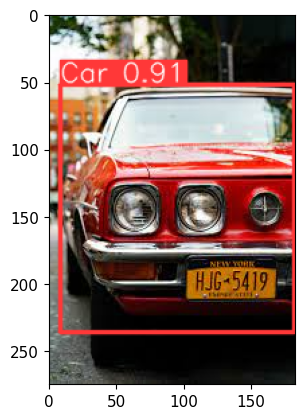

In [25]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [26]:
boxes = result.xyxy[0].tolist()
print(boxes)

[[8.214765548706055, 52.24968338012695, 182.31141662597656, 236.27162170410156, 0.9135094881057739, 0.0]]


In [27]:
num_boxes = len(boxes)
print("Number of boxes:", num_boxes)

Number of boxes: 1


In [28]:
vehicles_boxes = []
for box in boxes:
    x1, y1, x2, y2 = box[:4]
    # convert in integer format
    x1 = int(x1)
    y1 = int(y1)
    x2 = int(x2)
    y2 = int(y2)
    vehicles_boxes.append([x1,y1,x2,y2])
print(vehicles_boxes)
print("num of box", len(vehicles_boxes))    

[[8, 52, 182, 236]]
num of box 1


In [30]:
import cv2
window_name = 'Vehicle Detection'

color = (255, 0, 0)
thickness = 1

# Load the image
image_path = "D://Sneha//Intership of Arunoday Tech//Vehicle Plate recognition//testing//image31.jpg"
image = cv2.imread(image_path)
image_orig = image.copy()

if image is None:
    print('Failed to load image')
else:
    # Draw a rectangle on the image
    for vehi in vehicles_boxes:
        image_f = cv2.rectangle(image_orig, vehi[0:2], vehi[2:], color, thickness)

    # Display the image
    cv2.imshow(window_name, image_f)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [33]:
import cv2
import numpy as np

for vehi in vehicles_boxes:
    x1 = vehi[0]
    y1 = vehi[1]
    x2 = vehi[2]
    y2 = vehi[3]
    #print(x1,y1,x2,y2)
    cropped_image = image_orig[y1:y2, x1:x2]
    # Display the image
    #cv2.imshow("cropped_image", cropped_image)
    # Use Tesseract for text detection and recognition
recognized_text = pytesseract.image_to_string(cropped_image)
print(recognized_text)

In [31]:
import numpy as np
if isinstance(image_f, np.ndarray):
    print("The image is a NumPy array.")
else:
    print("The image is not a NumPy array.")

The image is a NumPy array.


In [ ]:
# Convert the modified numpy array back to PIL image
#modified_image = Image.fromarray(image_np)

In [17]:
# import keras_ocr
from PIL import Image
import numpy as np
import pytesseract

# Assuming you have a Numpy array called 'image_f'
# image_f = np.array(...)

# Create a PIL Image object from the Numpy array
modified_image = Image.fromarray(image_f)

In [18]:
if isinstance(modified_image, Image.Image):
    print("The variable is a PIL image.")
else:
    print("The variable is not a PIL image.")

The variable is a PIL image.


In [34]:
import pytesseract
from PIL import Image

# Load the image
# image = Image.open('path_to_image.jpg')

# Use Tesseract for text detection and recognition
recognized_text = pytesseract.image_to_string(image_f)
print(recognized_text)